In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the Data

In [2]:
data_set=pd.read_csv(r"c:\DATASCIENCE\PROJECT\water_potability.csv")
print(data_set)


            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [3]:
df=pd.DataFrame(data_set)
print(df.to_string())

             ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
0           NaN  204.890455  20791.318981     7.300212  368.516441    564.308654       10.379783        86.990970   2.963135           0
1      3.716080  129.422921  18630.057858     6.635246         NaN    592.885359       15.180013        56.329076   4.500656           0
2      8.099124  224.236259  19909.541732     9.275884         NaN    418.606213       16.868637        66.420093   3.055934           0
3      8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516       18.436524       100.341674   4.628771           0
4      9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813       11.558279        31.997993   4.075075           0
5      5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916        8.399735        54.917862   2.559708           0
6     10.223862  248.071735  28749.716544

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


#### Cleaning The Data

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df['ph']=df['ph'].fillna(df['ph'].mean(),)
print(df['ph'].isnull().sum())

0


In [7]:
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
print(df['Sulfate'].isnull().sum())

0


In [8]:
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
print(df['Trihalomethanes'].isnull().sum())

0


In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.rename(columns={'Sulfate': 'Sulphate'}, inplace=True)
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulphate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [11]:
df = df.drop_duplicates()
print(df.shape)

(3276, 10)


### Exploratory Data Analysis

#### Finding outliers

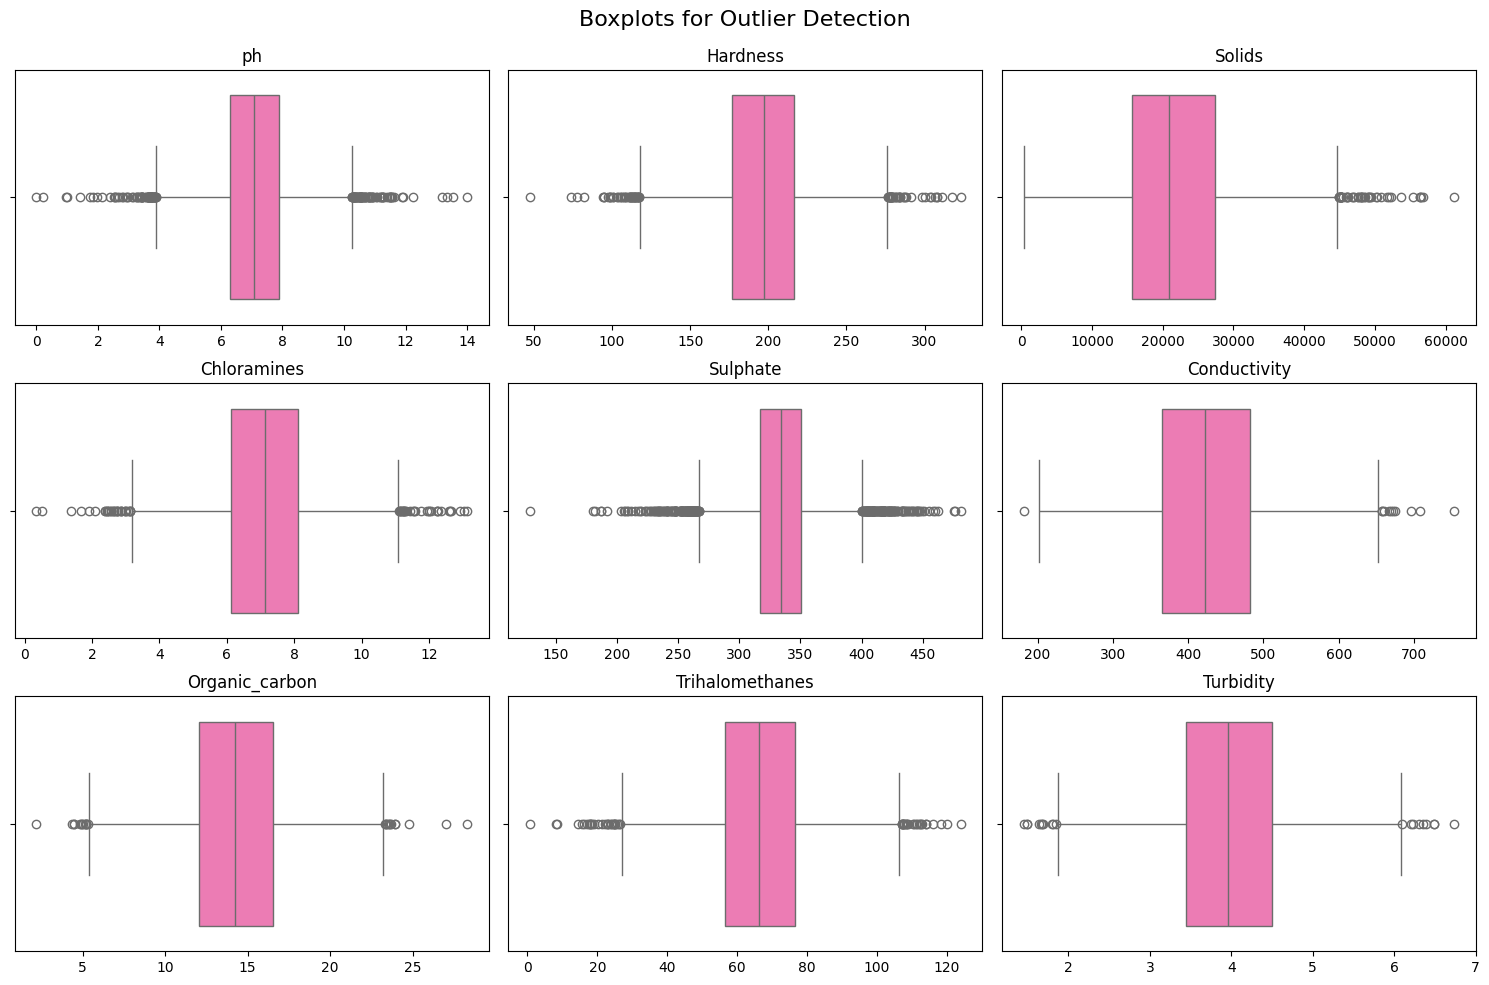

In [12]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulphate',
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

plt.figure(figsize=(15, 10))

for i in range(len(features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=features[i], color='hotpink')
    plt.title(features[i])
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Boxplots for Outlier Detection', fontsize=16)
plt.subplots_adjust(top=0.92)  
plt.show()

The boxplots show that many features have outliers—values that are much higher or lower than the rest. These outliers are visible as dots outside the main box areas. Handling these outlier

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_no_outliers.shape)

(2666, 10)


#### Finding Correlation

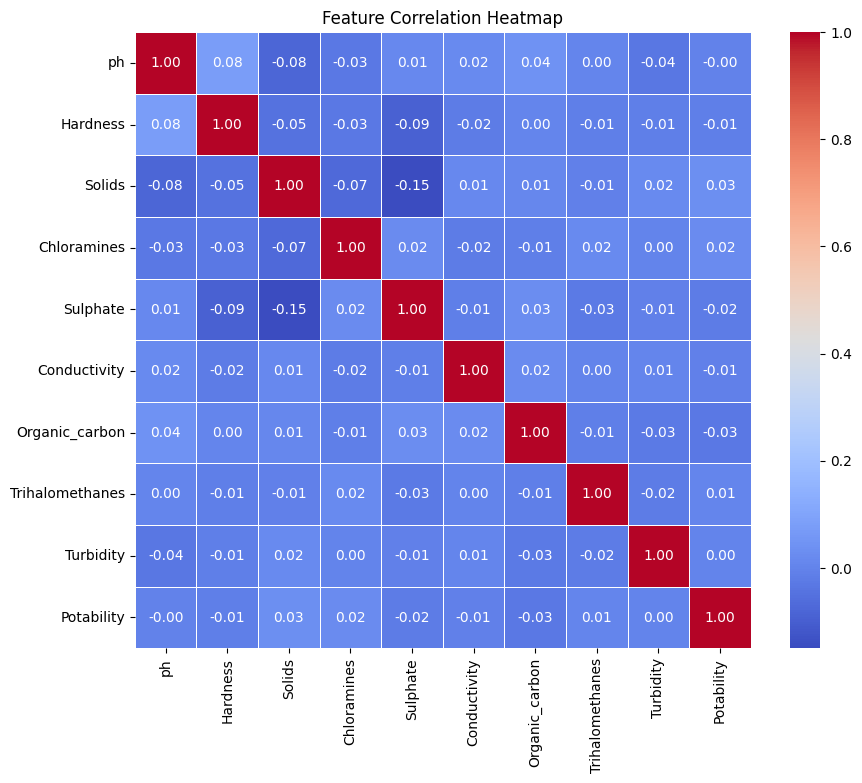

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

None of the features have a strong correlation with Potability. This means no single factor alone can clearly tell if water is safe—we likely need to look at a combination of factors to make accurate predictions.

### How many samples are Potable vs. Not Potable?

Potability Distribution:
Not Potable (0): 1998
Potable (1): 1278


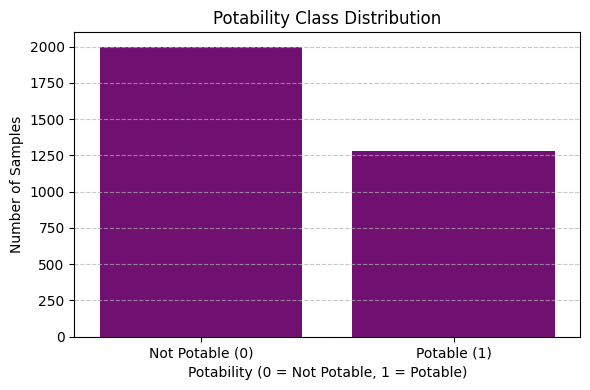

In [15]:
potability_counts = df['Potability'].value_counts()
print("Potability Distribution:")
print(f"Not Potable (0): {potability_counts.get(0, 0)}")
print(f"Potable (1): {potability_counts.get(1, 0)}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, color='purple')  # Use a single color
plt.title('Potability Class Distribution')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph shows that there are more samples of water that are not safe to drink (Not Potable) than those that are safe (Potable). This means the data is uneven, with more unsafe water samples than safe ones. This could affect how well a machine learning model learns to tell the difference.

#### What are the distributions of the different water quality parameters in the dataset?

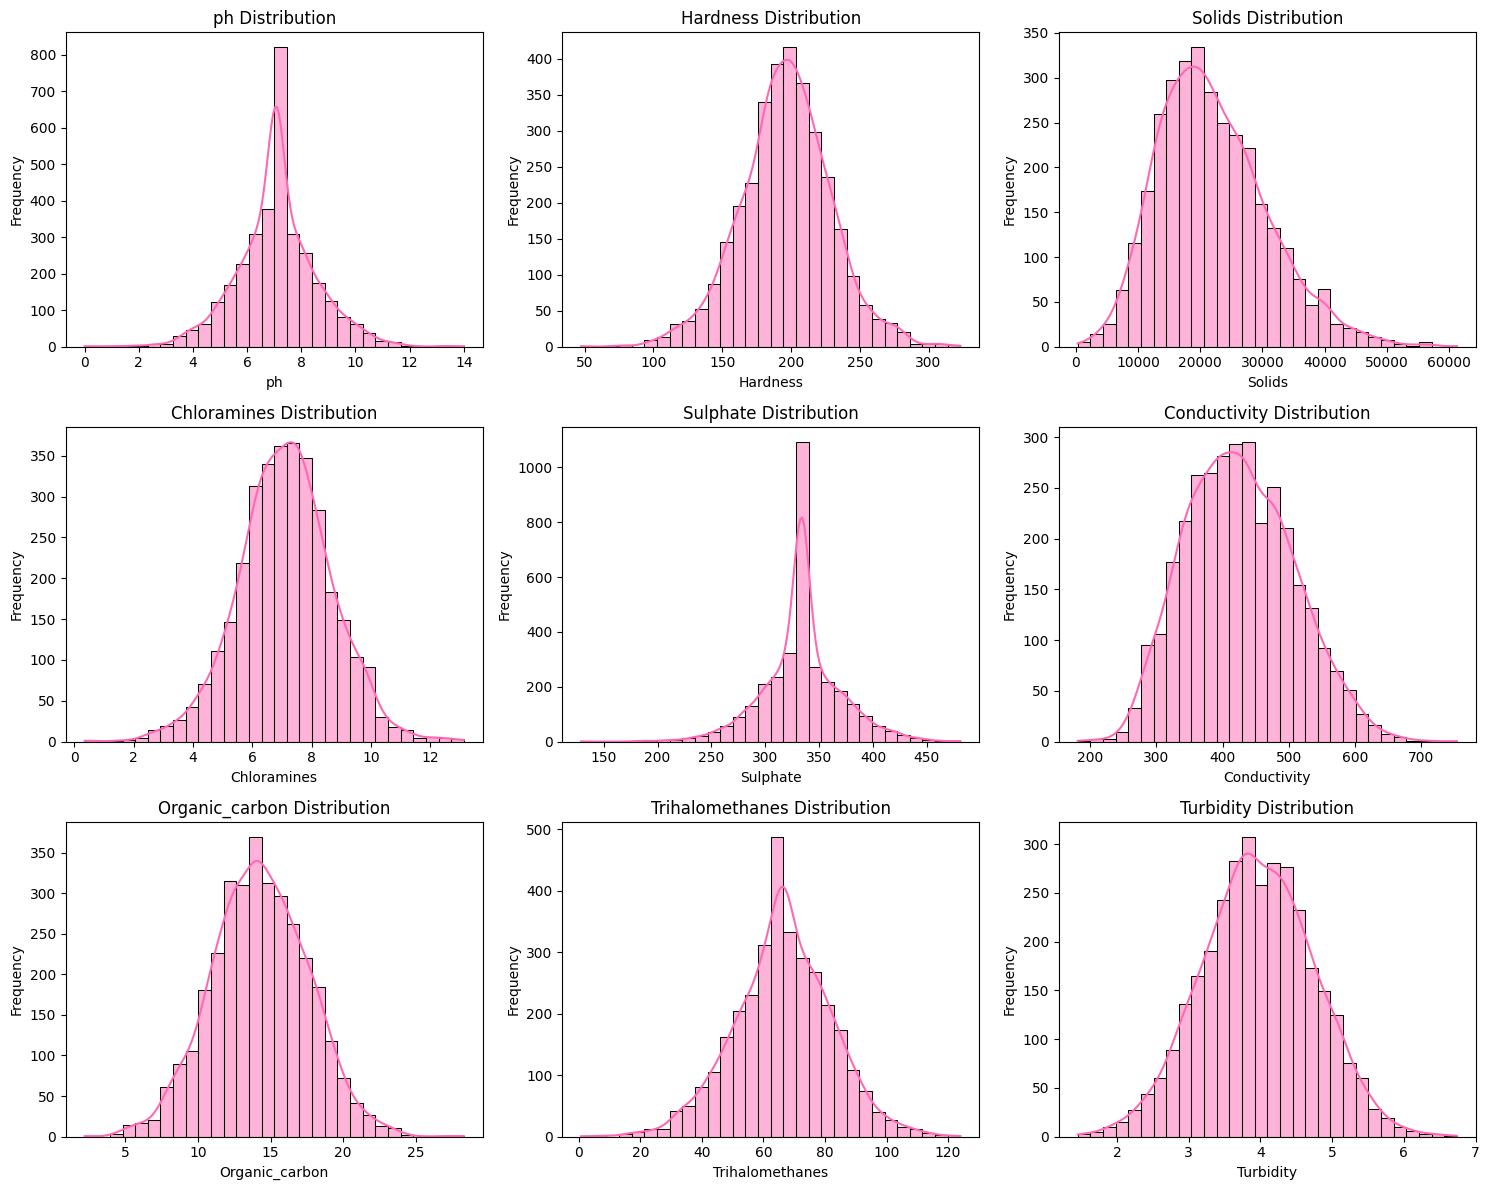

In [16]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulphate', 
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='hotpink')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most features are approximately normally distributed, especially Hardness, Chloramines, and Conductivity.

Features like Solids, Sulphate, Trihalomethanes, and Turbidity show right skewness, which might require normalization or transformation in some models.

No severe outliers are immediately evident, but features with long tails might benefit from preprocessing.

In [17]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### What is the typical pH range for potable vs non-potable water?

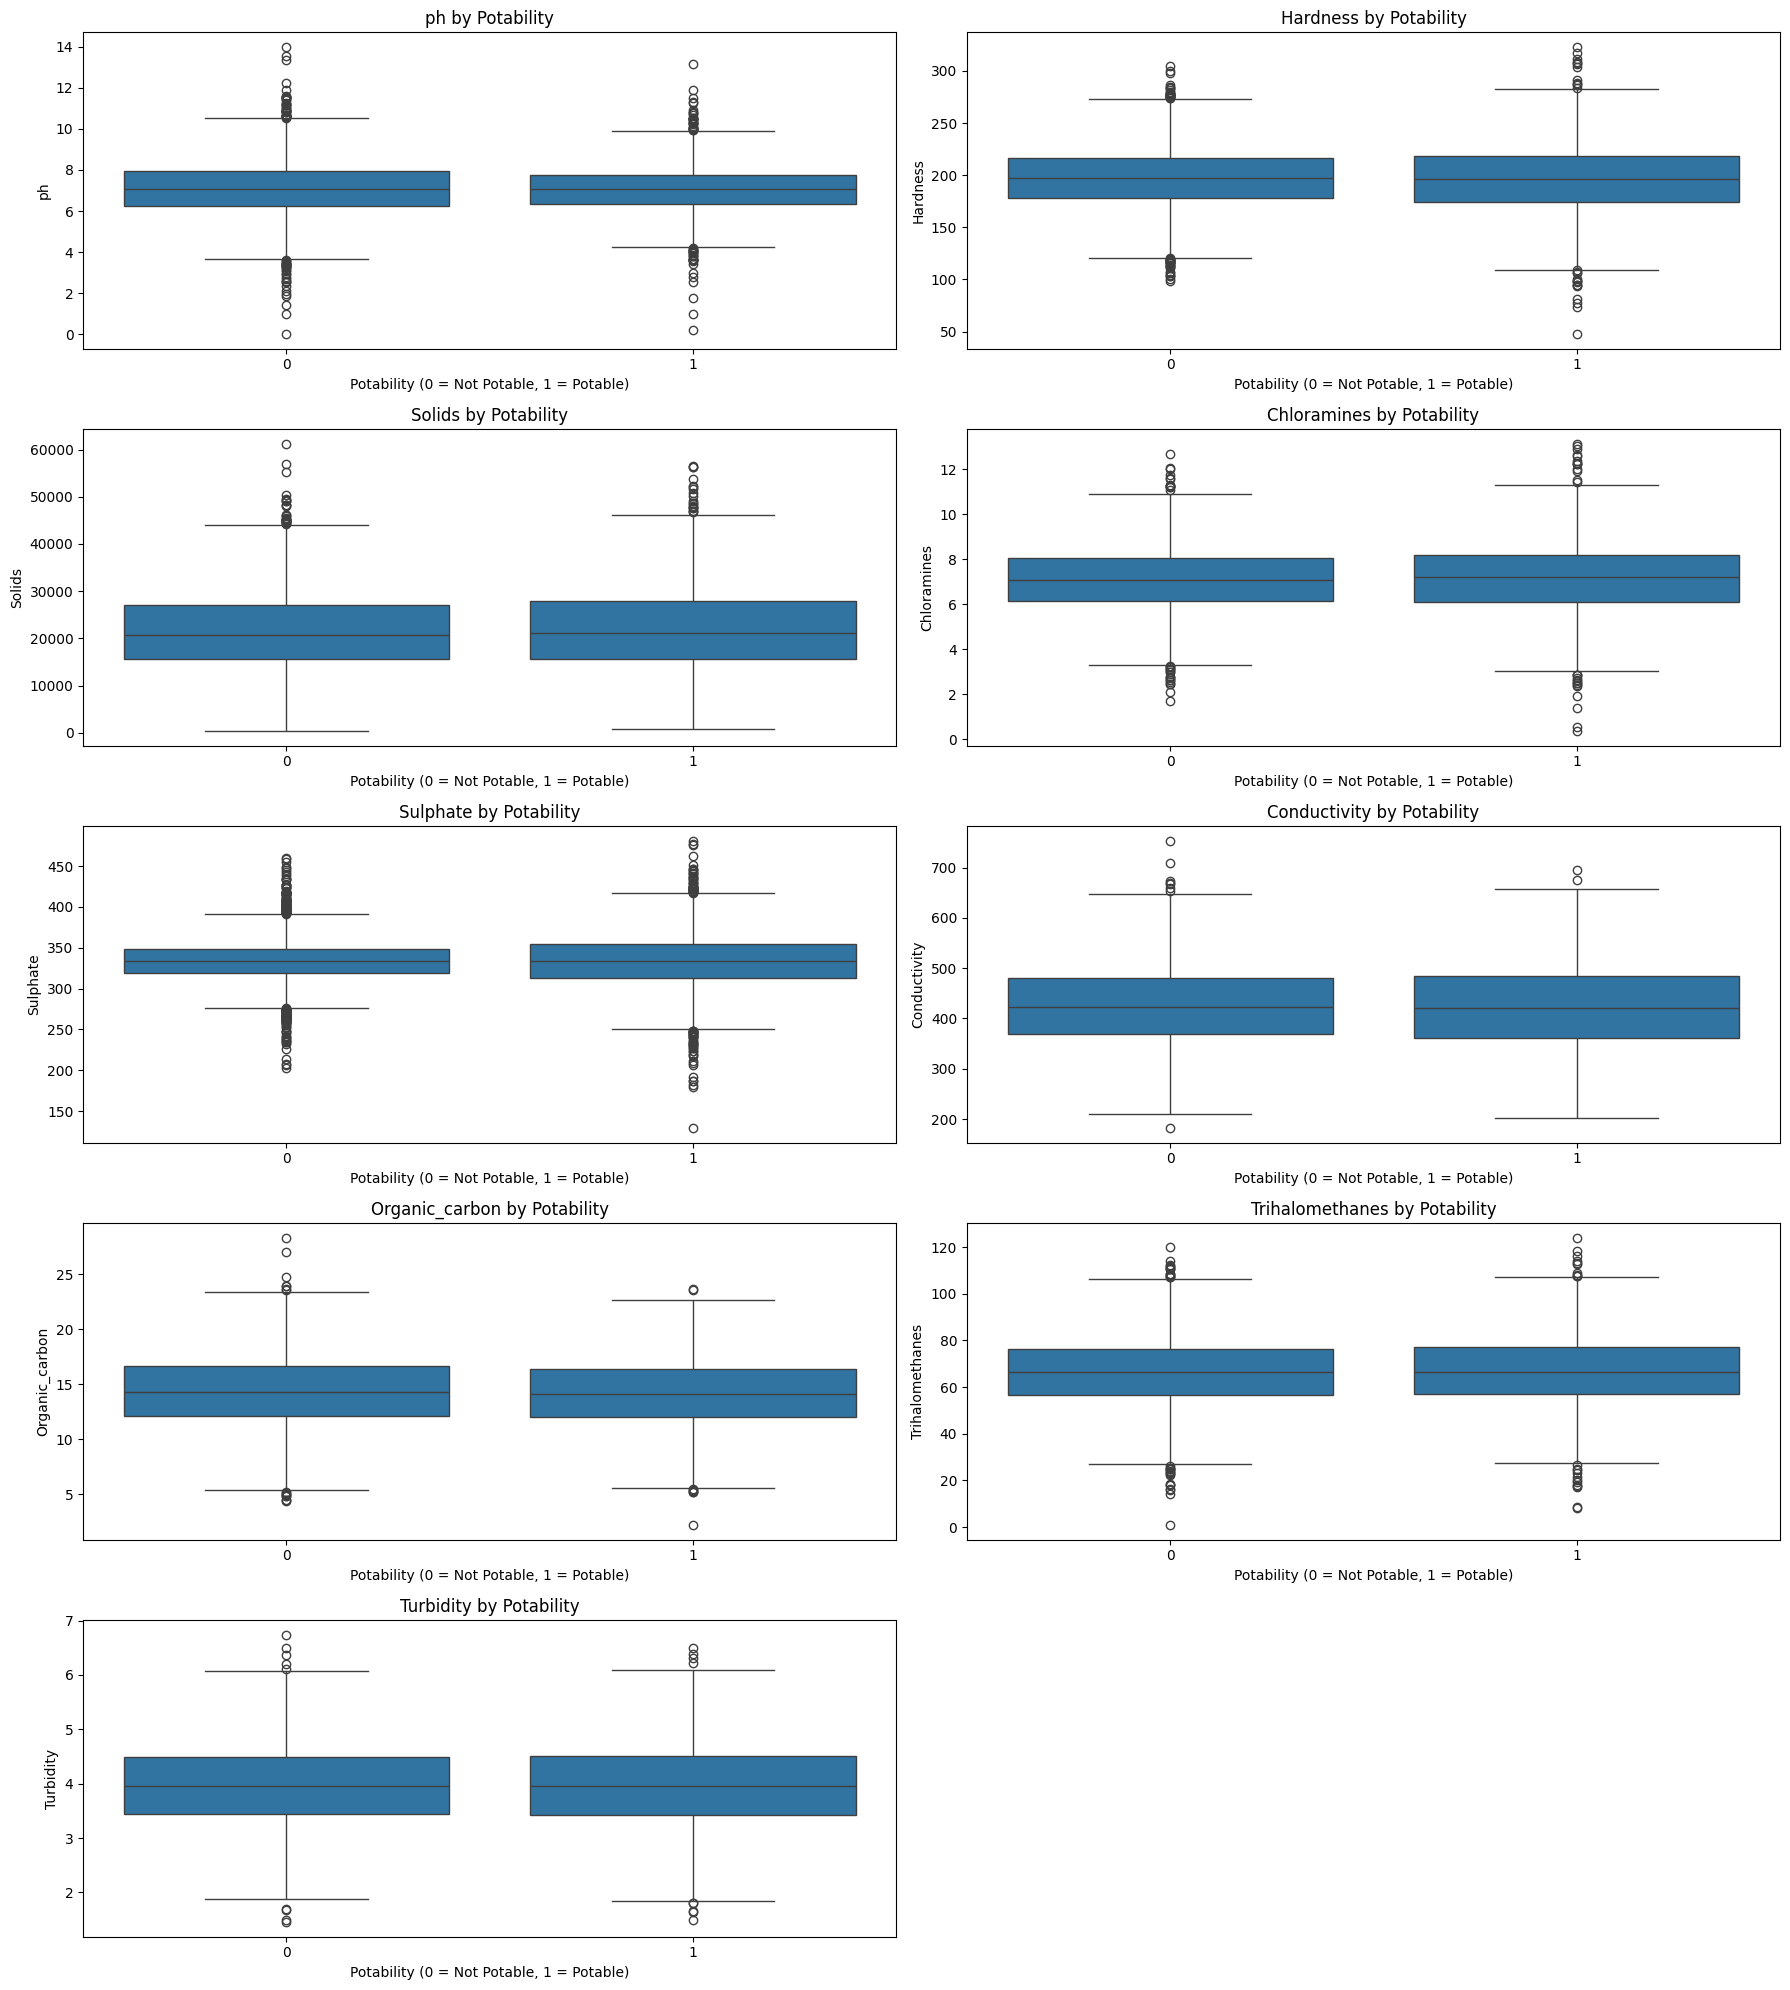

In [18]:
grouped_stats = df.groupby('Potability').describe()
# List of features to analyze
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulphate', 
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(18, 20))
for i, col in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Potability', y=col, data=df)
    plt.title(f'{col} by Potability')
    plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

Most features have overlapping distributions for potable and non-potable water, which suggests no single feature is a strong standalone predictor.

You may need a combination of features and possibly machine learning for accurate potability prediction.

#### Plot the distribution of 'Turbidity' for potable vs non-potable water

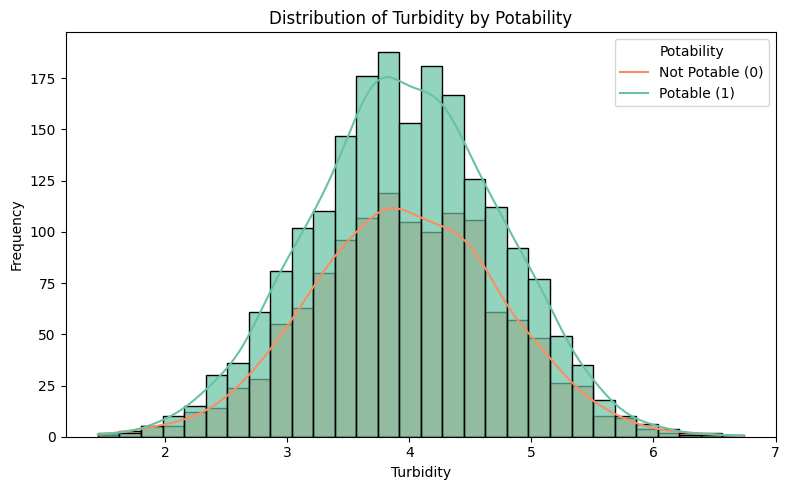

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Turbidity', hue='Potability', bins=30, kde=True, palette='Set2', alpha=0.7)
plt.title('Distribution of Turbidity by Potability')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')
plt.legend(title='Potability', labels=['Not Potable (0)', 'Potable (1)'])
plt.tight_layout()
plt.show()

#### Compare pH with potability

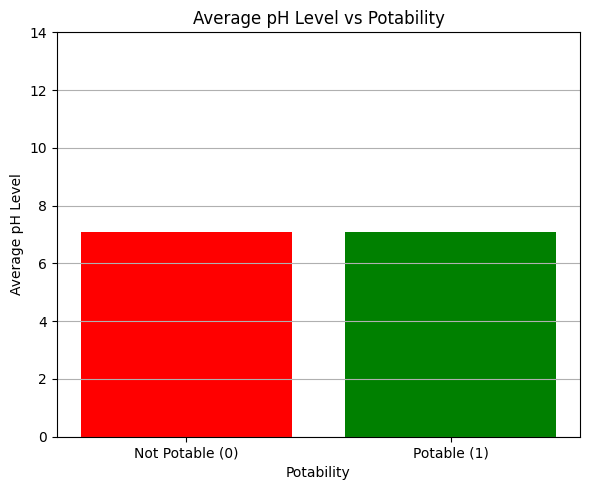

In [20]:
df["Potability"] = df["Potability"].astype(int)

# Drop rows with missing pH values
df = df.dropna(subset=["ph", "Potability"])

# Calculate mean pH for each potability class
mean_ph = df.groupby("Potability")["ph"].mean()

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(mean_ph.index.astype(str), mean_ph.values, color=["red", "green"])
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'])
plt.title("Average pH Level vs Potability")
plt.xlabel("Potability")
plt.ylabel("Average pH Level")
plt.ylim(0, 14)  # pH scale range
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar graph shows that the average pH levels are nearly the same for both potable and non-potable water.
This suggests that pH alone may not be a strong indicator of water potability.

#### Compare Potability with Hardness

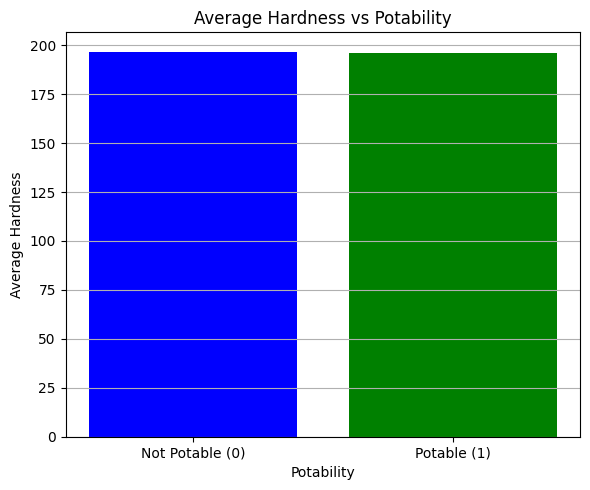

In [21]:
# Calculate mean Hardness for each potability class
mean_hardness = df.groupby("Potability")["Hardness"].mean()

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(mean_hardness.index.astype(str), mean_hardness.values, color=["blue", "green"])
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'])
plt.title("Average Hardness vs Potability")
plt.xlabel("Potability")
plt.ylabel("Average Hardness")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This bar graph shows that the average hardness of water is almost identical for both potable and non-potable categories.
This indicates that water hardness does not significantly affect whether water is safe to drink.











#### Compare Potability With Sulphate

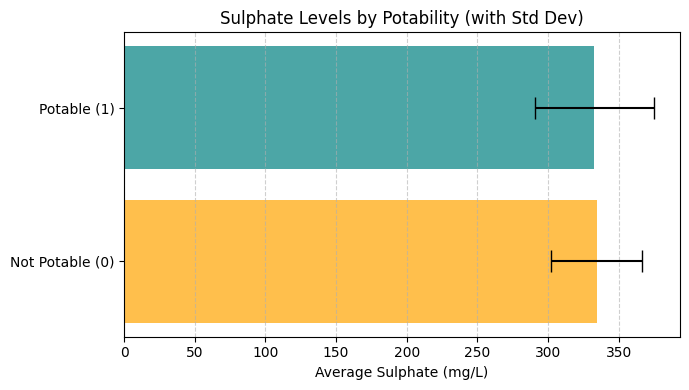

In [22]:
# Calculate mean and standard deviation of Sulphate for each potability class
sulphate_stats = df.groupby("Potability")["Sulphate"].agg(['mean', 'std'])

# Create a horizontal bar plot with error bars
plt.figure(figsize=(7, 4))
plt.barh(
    sulphate_stats.index.astype(str),
    sulphate_stats['mean'],
    xerr=sulphate_stats['std'],
    color=['orange', 'teal'],
    alpha=0.7,
    capsize=8
)
plt.yticks([0, 1], ['Not Potable (0)', 'Potable (1)'])
plt.xlabel("Average Sulphate (mg/L)")
plt.title("Sulphate Levels by Potability (with Std Dev)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

the average sulphate levels in potable and non-potable water, including standard deviation as error bars.
It shows that both categories have similar average sulphate concentrations, suggesting that sulphate level alone may not be a strong predictor of water potability.

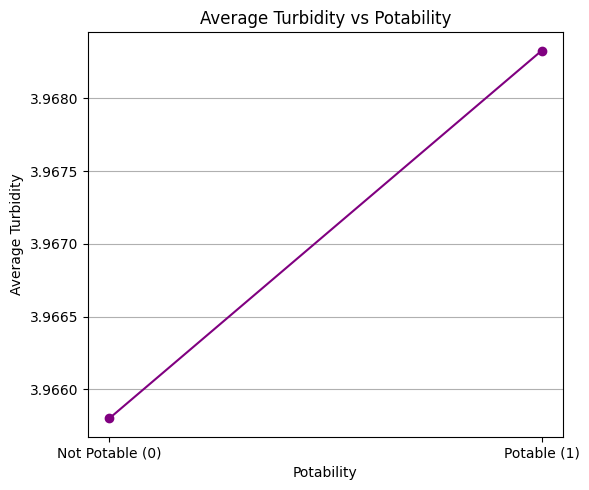

In [23]:
# Calculate mean Turbidity for each potability class
mean_turbidity = df.groupby("Potability")["Turbidity"].mean()

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(mean_turbidity.index.astype(str), mean_turbidity.values, marker='o', linestyle='-', color='purple')
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'])
plt.title("Average Turbidity vs Potability")
plt.xlabel("Potability")
plt.ylabel("Average Turbidity")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

There is no significant difference in turbidity between potable and non-potable water based on this graph.

Turbidity alone may not be a strong indicator of water potability in this dataset.

#### Logistic regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [25]:

# Features and target
X = df[features]
y = df['Potability']


In [26]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [27]:
# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
# Predictions
y_pred = logreg.predict(X_test)

In [29]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.6112804878048781


#### KNeighbours Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 

In [32]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.to_string())
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier: {accuracy * 100:.2f}%")

      Actual  Predicted
1004       0          1
1339       0          1
57         0          0
2097       0          1
2717       1          0
1644       0          0
1134       1          0
818        1          1
931        0          0
2525       0          0
1557       1          1
312        1          1
1030       0          0
1602       1          0
879        0          1
590        0          0
1947       1          0
340        1          0
1035       0          0
2906       0          1
180        0          0
1236       0          0
203        0          0
2512       0          0
1746       0          0
2017       1          1
2563       0          0
2045       1          0
2601       0          0
1711       0          0
41         0          0
764        1          0
467        0          1
857        0          1
474        0          1
1976       1          1
441        0          0
1109       1          0
2881       0          0
2643       0          0
288        1    

#### DecisionTree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# Train Decision Tree model
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred_tree = dtree.predict(X_test)

# Calculate accuracy
dtree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree Classifier: {dtree_accuracy * 100:.2f}%")

Accuracy of Decision Tree Classifier: 58.08%


In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {rf_accuracy * 100:.2f}%")

Accuracy of Random Forest Classifier: 64.48%


#### S V C


In [37]:
from sklearn.svm import SVC


In [38]:
# Train SVM model
svm_clf = SVC(kernel='rbf', random_state=0)
svm_clf.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_clf.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM Classifier: {svm_accuracy * 100:.2f}%")

Accuracy of SVM Classifier: 60.98%


#### Find the best parameters and best model using hypertuning of parameters 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize SVC
svc = SVC(random_state=0)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters for SVC:", grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_ * 100:.2f}%")

# Evaluate best model on test set
best_svc = grid_search.best_estimator_
test_accuracy = best_svc.score(X_test, y_test)
print(f"Test set accuracy with best SVC: {test_accuracy * 100:.2f}%")

Based on all the above algorithms, we can conclude that the Random Forest Classifier is the most accurate, with an accuracy of 64.48%